# Avistando ardillas en Central Park.

![](../images/photo.avif)

# Introducción

Planeamos visitar la ciudad Nueva York y queremos saber dónde es más probable encontrar ardillas. Para ello, vamos a explorar un dataset de avistamientos de ardillas en la ciudad de Nueva York

# ¿Cuál es el mejor lugar de Central Park para poder ver ardillas?

Veamos si es posible responder a esta simple pregunta con el dataset que tenemos y saber algunas cosas más sobre ellas.

# Cargando librerías

Python es un elnguaje de programación fantástico que incluye muchas funciones para hacer operaciones básicas. Sin embargo, no siempre es posible hacer todo lo que queramos con las funciones que dispone Python. En estos casos, solo hay dos opciones:

* Creamos nosotros una función nueva
* Utilizamos una que haya creado otra persona

Nosotros vamos a utilizar la segunda opción, ya que muchas veces la función que buscamos ya ha sido creada por terceras personas y guardada una librería que se ha puesto a disposición de la comunidad de programadores.

Hay infinidad de librerías para todo tipo de usos y a veces no es fácil saber si hay alguna/s librerías que contengan una función que nos permita hacer lo que deseamos. Con la práctica y en el Bootcamp de Data Analytics veremos las más comunes en Análisis de datos.

Si la librería no está instalada en nuestro sistema, deberemos instalarla primero y luego "importarla" para poder tener acceso a todas las funciones que contiene. Algunas veces, sólo estaremos interesados en alguna/s funciones por lo que solo "importaremos" dichas funciones en lugar de todas las existentes en la librería.

Además, en algunas ocasiones podemos utilizarlas con un nombre más corto para evitar teclear tanto. 

Veámos qué librerías vamos a utilizar.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
import folium
import ee
import geemap.foliumap as geemap
# Esto es un comentario.
# La línea inferior evitará que cada gráfico se abra en una ventana a parte del notebook actual. 
# En su lugar, Python abrirá el gráfico dentro del mismo notebook.
%matplotlib inline

# Lectura de los datos

Gracias a la librería [pandas](https://pandas.pydata.org/), es posible leer datos de ficheros separados por comas (*.csv) en Python al igual que lo haríamos en una hoja de Excel. El formato de salida es una tabla denorminada *dataframe* cuyas filas y columnas están etiquetadas.

Veámos como leer nuestro fichero "nyc_squirrels.csv" de avistamientos en Python usando la librería "Pandas".

In [2]:
df = pd.read_csv('../data/nyc_squirrels.csv')
# Veámos qué contiene el fichero
df

long        lat unique_squirrel_id hectare shift      date  \
0    -73.956134  40.794082     37F-PM-1014-03     37F    PM  10142018   
1    -73.957044  40.794851     37E-PM-1006-03     37E    PM  10062018   
2    -73.976831  40.766718      2E-AM-1010-03     02E    AM  10102018   
3    -73.975725  40.769703      5D-PM-1018-05     05D    PM  10182018   
4    -73.959313  40.797533     39B-AM-1018-01     39B    AM  10182018   
...         ...        ...                ...     ...   ...       ...   
3018 -73.963943  40.790868     30B-AM-1007-04     30B    AM  10072018   
3019 -73.970402  40.782560     19A-PM-1013-05     19A    PM  10132018   
3020 -73.966587  40.783678     22D-PM-1012-07     22D    PM  10122018   
3021 -73.963994  40.789915     29B-PM-1010-02     29B    PM  10102018   
3022 -73.975479  40.769640      5E-PM-1012-01     05E    PM  10122018   

      hectare_squirrel_number       age primary_fur_color  \
0                           3       NaN               NaN   
1                           3     Adult              Gray   
2                           3     Adult          Cinnamon   
3                           5  Juvenile              Gray   
4                           1       NaN               NaN   
...                       ...       ...               ...   
3018                        4     Adult              Gray   
3019                        5     Adult              Gray   
3020                        7     Adult              Gray   
3021                        2       NaN              Gray   
3022                        1     Adult          Cinnamon   

         highlight_fur_color  ... approaches indifferent runs_from  \
0                        NaN  ...      False       False     False   
1                   Cinnamon  ...      False       False      True   
2                        NaN  ...      False        True     False   
3                        NaN  ...      False       False      True   
4                        NaN  ...      False       False     False   
...                      ...  ...        ...         ...       ...   
3018                     NaN  ...      False       False      True   
3019                   White  ...      False        True     False   
3020  Black, Cinnamon, White  ...      False        True     False   
3021         Cinnamon, White  ...      False        True     False   
3022             Gray, White  ...       True       False     False   

     other_interactions                                      lat_long  \
0                   NaN    POINT (-73.9561344937861 40.7940823884086)   
1                    me  POINT (-73.9570437717691 40.794850940803904)   
2                   NaN   POINT (-73.9768311751004 40.76671780725581)   
3                   NaN    POINT (-73.9757249834141 40.7697032606755)   
4                   NaN     POINT (-73.9593126695714 40.797533370163)   
...                 ...                                           ...   
3018                NaN    POINT (-73.9639431360458 40.7908677445466)   
3019                NaN    POINT (-73.9704015859639 40.7825600069973)   
3020                NaN    POINT (-73.9665871993517 40.7836775064883)   
3021                NaN    POINT (-73.9639941227864 40.7899152327912)   
3022                NaN    POINT (-73.9754794191553 40.7696404489025)   

      zip_codes  community_districts  borough_boundaries  \
0           NaN                   19                   4   
1           NaN                   19                   4   
2           NaN                   19                   4   
3           NaN                   19                   4   
4           NaN                   19                   4   
...         ...                  ...                 ...   
3018        NaN                   19                   4   
3019        NaN                   19                   4   
3020        NaN                   19                   4   
3021        NaN                   19                   4   
3022        NaN        

# Limpiando los datos

![](../images/photo2.avif)

Una de las tareas más penosas y tediosas de un analista de datos es la limpieza de los datos. No podemos pretender hacer un análisis si nuestros datos no son consistentes, faltan datos...etc. Este primer paso (la limpieza de datos) es la parte que más tiempo consume para un analista de datos; típicamente el 80% de su tiempo.

## Valores nulos

Por desgracia, en la mayoría de conjuntos de datos reales faltan datos. Algunos motivos pueden ser:

* No se sabe el valor
* Se introdujo una nueva columna y por lo tanto no se conocen los valores de dicha columna para datos anteriores
* No sabe/no contesta
* No se consideró relevante
...

La falta de valores en una tabla supondrá un grave problema en el momento en que queramos construir un modelo predictivo, ya que la mayoría de los modelos no pueden realizar predicciones si no se conocen todos los valores de todas las columnas en cada fila de nuestra tabla.

Empecemos contando cuántos valores faltan en cada columna de nuestro fichero

In [3]:
df.isna().sum()

long                                             0
lat                                              0
unique_squirrel_id                               0
hectare                                          0
shift                                            0
date                                             0
hectare_squirrel_number                          0
age                                            121
primary_fur_color                               55
highlight_fur_color                           1086
combination_of_primary_and_highlight_color       0
color_notes                                   2841
location                                        64
above_ground_sighter_measurement               114
specific_location                             2547
running                                          0
chasing                                          0
climbing                                         0
eating                                           0
foraging                       

## Tipos de datos

En analítica de datos, existen básicamente tres tipos distintos de datos:
    
* Numéricos
* Categóricos (etiquetas):
    * Ordinales (tienen un orden intrínseco)
    * Nominales (no tienen un orden intrínseco)
* Fechas

La manera de trabajar con cada tipo es distinta y por lo tanto es muy importante asegurarse de que el tipo de cada columna ha sido correctamente entendido por "Pandas" (no siempre es así).

Veámos cómo podemos obtener esta información en "Pandas".

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   long                                        3023 non-null   float64
 1   lat                                         3023 non-null   float64
 2   unique_squirrel_id                          3023 non-null   object 
 3   hectare                                     3023 non-null   object 
 4   shift                                       3023 non-null   object 
 5   date                                        3023 non-null   int64  
 6   hectare_squirrel_number                     3023 non-null   int64  
 7   age                                         2902 non-null   object 
 8   primary_fur_color                           2968 non-null   object 
 9   highlight_fur_color                         1937 non-null   object 
 10  combination_

Podemos ver que en este dataset hay cuatro tipos de columnas:

* bool -> boleanos (Verdadero/Falso)
* float64 -> números decimales
* int64 -> números enteros
* object -> caracteres ó etiquetas


## Estadísticos básicos

Un primer análisis rápido que podemos llevar a cabo con las columnas numéricas es ver cuáles son sus rangos de valores, máximos, mínimos, medias, desviaciones estándard, quantiles,..etc. Para ello podemos hacer uso de ".describe()"

In [5]:
df.describe()

long          lat          date  hectare_squirrel_number  \
count  3023.000000  3023.000000  3.023000e+03              3023.000000   
mean    -73.967184    40.780853  1.011949e+07                 4.123718   
std       0.007726     0.010285  4.246671e+04                 3.096492   
min     -73.981159    40.764911  1.006202e+07                 1.000000   
25%     -73.973102    40.771676  1.008202e+07                 2.000000   
50%     -73.968594    40.778166  1.012202e+07                 3.000000   
75%     -73.960189    40.791219  1.014202e+07                 6.000000   
max     -73.949722    40.800119  1.020202e+07                23.000000   

          zip_codes  community_districts  borough_boundaries  \
count      9.000000          3023.000000              3023.0   
mean   11828.222222            18.996030                 4.0   
std      995.983782             0.234339                 0.0   
min    10090.000000            11.000000                 4.0   
25%    12081.000000            19.000000                 4.0   
50%    12420.000000            19.000000                 4.0   
75%    12423.000000            19.000000                 4.0   
max    12423.000000            23.000000                 4.0   

       city_council_districts  police_precincts  
count             3023.000000       3023.000000  
mean                19.070460         13.004631  
std                  1.352253          0.224224  
min                 19.000000         10.000000  
25%                 19.000000         13.000000  
50%                 19.000000         13.000000  
75%                 19.000000         13.000000  
max                 51.000000         18.000000

De ta tabla anterior podemos ver claramente que los rangos de valores de cada columna son muy diferentes entre sí. Esto supone un grave problema para algunos modelos predictivos (no todos), por lo que si queremos utilizar modelos que sean sensibles a los rangos de valores deberemos poner todas las columnas en el mismo rango y eliminar sus unidades para poder hacer comparar peras con peras y manzanas con manzanas.

## Eliminando columnas

No siempre todas las columnas de un dataset son necesariamente relevantes en la exploración de datos. Hay varios motivos por lo que una columna pueda ser irrelvante:

* todos los valores de la columna son iguales
* los valores son identificadores únicos
* los datos que contienen no son relevantes 

en estos casos ( especialmente en el primero ) nos interesa eliminar la columna por que no aporta datos que permitan distinguir entre distintas observaciones/filas. En el segundo caso puede interesar mantenerla para hacer un análisis de los errores de un modelo. Sin embargo, los modelos no usan estos valores como variables predictivas.

Veámos cómo podemos eliminar columnas de nuestro dataset.

In [6]:
df = df.drop(columns=['zip_codes'], axis = 1)

## Selecionando columnas por tipo

Ya hemos mencionado anteriormente que la manera de tratar con columnas numéricas, categóricas ó fechas es distinta. Por ello, es interesante poder seleccionar columnas en función de su tipo para poder así darles un tratamiento distinto. 

Veámos cómo.

In [7]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(object)

In [8]:
df_num

long        lat      date  hectare_squirrel_number  \
0    -73.956134  40.794082  10142018                        3   
1    -73.957044  40.794851  10062018                        3   
2    -73.976831  40.766718  10102018                        3   
3    -73.975725  40.769703  10182018                        5   
4    -73.959313  40.797533  10182018                        1   
...         ...        ...       ...                      ...   
3018 -73.963943  40.790868  10072018                        4   
3019 -73.970402  40.782560  10132018                        5   
3020 -73.966587  40.783678  10122018                        7   
3021 -73.963994  40.789915  10102018                        2   
3022 -73.975479  40.769640  10122018                        1   

      community_districts  borough_boundaries  city_council_districts  \
0                      19                   4                      19   
1                      19                   4                      19   
2                      19                   4                      19   
3                      19                   4                      19   
4                      19                   4                      19   
...                   ...                 ...                     ...   
3018                   19                   4                      19   
3019                   19                   4                      19   
3020                   19                   4                      19   
3021                   19                   4                      19   
3022                   19                   4                      19   

      police_precincts  
0                   13  
1                   13  
2                   13  
3                   13  
4                   13  
...                ...  
3018                13  
3019                13  
3020                13  
3021                13  
3022                13  

[3023 rows x 8 columns]

Cuando vemos la tabla anterior, enseguida nos percatamos de un algo muy raro. La tercera columna, contiene la fecha del avistamiento. Sin embargo, se ha interpretado como un número en lugar de una fecha y tendremos que corregilo más adelante.

## Tratando los valores nulos

Como hemos comentado anteriormente, los valores nulos representan un problema cuando queremos construir modelos predictivos ya que estos no admiten valores nulos. Ante la presencia de valores nulos, hay dos maneras de proceder:

* eliminar la fila/columna que contiene valores nulos
* asignarles un valor:
    * basándose en un conocimiento del contexto del dataset
    * basándose en los valores restantes en la misma columna
    * basándose de los valores en el resto de columnas
    
La opción a usar depende mucho del dataset, su tamaño y el número de valores nulos presentes en la columna. No hay una respuesta válida para todos los casos. Además todas las soluciones tendrán un impacto en el resultado final: "todo tiene un precio". ¿Vale la pena pagarlo? Depende.

Empecemos a ver algunas opciones 

In [9]:
df_cat
df_cat.isna().sum()

unique_squirrel_id                               0
hectare                                          0
shift                                            0
age                                            121
primary_fur_color                               55
highlight_fur_color                           1086
combination_of_primary_and_highlight_color       0
color_notes                                   2841
location                                        64
above_ground_sighter_measurement               114
specific_location                             2547
other_activities                              2586
other_interactions                            2783
lat_long                                         0
dtype: int64

Si queremos reemplazar valores nulos de una columna basándonos únicamente en los valores que sí sabemos de dicha columna, lo primero que debemos hacer es obtener la frecuencia de apacición de cada posible valor en dicha columna.

Veámos cómo se hace.

In [10]:
df['location'].value_counts(dropna=False)

Ground Plane    2116
Above Ground     843
NaN               64
Name: location, dtype: int64

Claramente, podemos ver que en la mayoría de los avistamientos las ardillas estaban en el suelo mientras que en 64 casos no conocemos el valor. Parece razonable hacer la **suposición** de que los avistamientos que contienen valores nulos en esta columna corresponden a ardillas que estaban en el suelo dado que: es raro caminar mirando los árboles (a menos que uno esté interesado en ellos) y que la mayoría de los avistamientos corresponden a ardillas que están en el suelo. 

Veámos cómo reemplazar los valores nulos de esta columna por "Ground Plane".

In [11]:
df['location']=df['location'].fillna('Ground Plane')
df['location'].value_counts(dropna=False)

Ground Plane    2180
Above Ground     843
Name: location, dtype: int64

Hagamos lo mismo con la columna "above_ground_sighter_measurement"

In [12]:
df['above_ground_sighter_measurement'].value_counts(dropna=False)

FALSE    2116
10        116
NaN       114
20         84
15         71
2          55
3          52
5          51
30         44
4          42
25         33
6          32
8          30
1          30
40         25
7          19
50         19
12         16
13         11
35         10
28          7
100         5
18          5
9           4
45          4
60          3
17          3
16          2
23          2
14          2
24          2
43          2
65          2
11          2
180         1
70          1
33          1
80          1
19          1
31          1
0           1
55          1
Name: above_ground_sighter_measurement, dtype: int64

In [13]:
df['above_ground_sighter_measurement']=df['above_ground_sighter_measurement'].fillna('FALSE')

In [14]:
df['above_ground_sighter_measurement'].value_counts(dropna=False)

FALSE    2230
10        116
20         84
15         71
2          55
3          52
5          51
30         44
4          42
25         33
6          32
1          30
8          30
40         25
7          19
50         19
12         16
13         11
35         10
28          7
18          5
100         5
45          4
9           4
60          3
17          3
14          2
24          2
43          2
23          2
65          2
11          2
16          2
33          1
0           1
31          1
19          1
55          1
180         1
80          1
70          1
Name: above_ground_sighter_measurement, dtype: int64

## ¿Qué estaban haciendo las ardillas cuando fueron avistadas?

In [15]:
df['other_activities'].value_counts(dropna = False)

NaN                                                 2586
digging                                               19
sitting                                               16
walking                                               14
burying                                               12
                                                    ... 
digging?                                               1
took a chestnut                                        1
running (from birds)                                   1
i think it climbed the tree when i first saw it.       1
collecting nest material                               1
Name: other_activities, Length: 308, dtype: int64

En este columna, no tenemos manera de intuir cuál podría ser la actividad que estaba llevando a cabo la ardilla cuando fue avistada. Sin embargo, podemos asumir de manera razonable que no era ninguna de las otras actividades ya que entonces se habría anotado dicha actividad. Por ello, a los valores nulos les vamos a asignar un valor comodín "No Activity".

In [16]:
df['other_activities']=df['other_activities'].fillna('No Activity')
df['other_activities'].value_counts(dropna = False)

No Activity                                         2586
digging                                               19
sitting                                               16
walking                                               14
burying                                               12
                                                    ... 
digging?                                               1
took a chestnut                                        1
running (from birds)                                   1
i think it climbed the tree when i first saw it.       1
collecting nest material                               1
Name: other_activities, Length: 308, dtype: int64

Veámos la columna "other_interactions":

In [17]:
df['other_interactions'].value_counts(dropna = False)

NaN                                         2783
runs from (dog)                                9
curious                                        6
runs from (me)                                 5
me                                             4
                                            ... 
runs from (dogs)                               1
eyes from a safe distance                      1
kids were trying to poke it with a stick       1
walks from                                     1
ran from dog-walker                            1
Name: other_interactions, Length: 198, dtype: int64

Nuevamente, vamos a seguir aquí la misma estrategia que con la columna anterior y vamos a reemplazar los valores nulos por un comodín: "No interactions".

In [18]:
df['other_interactions']=df['other_interactions'].fillna('No Interactions')
df['other_interactions'].value_counts(dropna = False)

No Interactions                               2783
runs from (dog)                                  9
curious                                          6
runs from (me)                                   5
me                                               4
                                              ... 
eyes from a safe distance                        1
kids were trying to poke it with a stick         1
walks from                                       1
runs from (me!)—from a pretty big distance       1
ran from dog-walker                              1
Name: other_interactions, Length: 198, dtype: int64

Ahora toca el turno de las columnas:
    
* color_notes
* specific_location

In [19]:
df['color_notes'].value_counts(dropna = False)

NaN                                                                                                 2841
Gray & Cinnamon selected as Primary. White selected as Highlights. Made executive adjustments.         9
white belly                                                                                            5
White tail                                                                                             4
Gray & Cinnamon selected as Primary. Nothing selected as Highlights. Made executive adjustments.       4
                                                                                                    ... 
Cinnamon head, White belly                                                                             1
Too far & cloudy to tell                                                                               1
Gray & White selected as Primary & Highlights. Made executive adjustments.                             1
white neck and belly                                   

In [20]:
df['specific_location'].value_counts(dropna = False)

NaN                       2547
tree                        43
in tree                     32
on fence                     8
Tree                         7
                          ... 
Climbs small tree            1
next to the hole of #6       1
bottom of tree               1
By the main road             1
Behind fence, tree           1
Name: specific_location, Length: 305, dtype: int64

Estas columnas contienen **demasiados valores nulos** (casi la mayoría de ellos) por lo que no es razonable reemplazarlos por algún valor no nulo de la misma columna. Así que lo que haremos en poner estas columnas en una "lista negra" de columnas a eliminar.

In [21]:
# lista negra de columnas a eliminar por contener demasiados valores nulos.
cols_drop = ['color_notes','specific_location']

Analicemos ahora, la columnna edad de las ardillas.

In [22]:
df['age'].value_counts(dropna = False)

Adult       2568
Juvenile     330
NaN          121
?              4
Name: age, dtype: int64

Esta columna es interesante por dos motivos. El primero es que sólo toma dos valores:

* Adult
* Juvenile

El segundo motivo es que no siempre los valores nulos vendrán en el dataset como un "precioso" NaN. En algunos datasets, los valores desconocidos pueden tomar otro valor como en este caso: "?". Consideraremos ambos valores nulos y los vamos a reemplazar por el valor "Adult" con la **suposición** de que las ardillas jóvenes son tan raras de ver que si uno/a hubiera visto una joven enseguida se acordaría y por lo tanto habría tomado nota de ello.

In [23]:
df['age']=df['age'].fillna('Adult')
df.loc[df["age"] == "?", "age"] = "Adult"
df['age'].value_counts(dropna = False)

Adult       2693
Juvenile     330
Name: age, dtype: int64

## De qué color eran las ardillas que se avistaron?

In [24]:
df['primary_fur_color'].value_counts(dropna=False)

Gray        2473
Cinnamon     392
Black        103
NaN           55
Name: primary_fur_color, dtype: int64

Aquí **asumiremos** nuevamente que los valores nulos corresponden el color más frecuente: gris.

In [25]:
df['primary_fur_color']=df['primary_fur_color'].fillna('Gray')
df['primary_fur_color'].value_counts(dropna=False)

Gray        2528
Cinnamon     392
Black        103
Name: primary_fur_color, dtype: int64

La columna "combination_of_primary_and_highlight_color" es un poco más peliaguda. Veámos por qué

In [26]:
df['combination_of_primary_and_highlight_color'].value_counts()

Gray+                          895
Gray+Cinnamon                  752
Gray+White                     489
Gray+Cinnamon, White           265
Cinnamon+Gray                  162
Cinnamon+White                  94
Black+                          74
Cinnamon+                       62
Cinnamon+Gray, White            58
+                               55
Gray+Black, Cinnamon, White     32
Gray+Black                      24
Black+Cinnamon                  15
Cinnamon+Black                  10
Gray+Black, Cinnamon             9
Black+Gray                       8
Gray+Black, White                7
Cinnamon+Black, White            3
Black+Cinnamon, White            3
Cinnamon+Gray, Black             3
Black+White                      2
Black+Gray, White                1
Name: combination_of_primary_and_highlight_color, dtype: int64

### Usando un filtro

La columna anterior contiene muchos valores posibles ya que corresponden a la combinación de color primario y el secundario. Además, no parece contener valores nulos. En cambio, sí que contiene un valor especial: "+" que podems intuir que corresponde a más de un color (entre los cuales el más frecuente es el gris). Así que reemplazaremos todos los valores "+" por "Gray+". Para ello, necesitamos hacer uso de un **filtro**. Como hemos visto con la alumna "age", una de las maneras de usar filtros es mediante el uso del método: ".loc[,]"que contiene dos "espacios" separados por una "coma". El primero corresponde a las filas y el segundo a las columnas. Su sintaxis es la siguiente:

```python
df.loc[etiqueta_de_fila, etiqueta_de_columna]
```

donde "etiqueta_de_fila" y "etiqueta_de_columna" corresponden a las "etiquetas" de las filas y columnas que queremos obtener respectivamente. Estos valores pueden ser una etiqueta simple ó una "lista" de etiquetas. Además, también podemos poner "condiciones" en "etiquetas_de_fila" como por ejemplo: *df[col3] == valor*.

Vamos a usar esto en nuestro beneficio. Lo que pretendemos hacer es reemplazar las filas cuyo valor de la columna "combination_of_primary_and_highlight_color" sea igual a "+", por lo que nuestra condición será:

```python
df["combination_of_primary_and_highlight_color"] == "+"
```

ahora solo queda reemplazar los valores de las filas que cumplan la condición anterior:

```python
df.loc[df["combination_of_primary_and_highlight_color"] == "+","combination_of_primary_and_highlight_color"] = valor
```

In [27]:
df.loc[df["combination_of_primary_and_highlight_color"] == "+", "combination_of_primary_and_highlight_color"] = "Gray+"
df["combination_of_primary_and_highlight_color"].value_counts()

Gray+                          950
Gray+Cinnamon                  752
Gray+White                     489
Gray+Cinnamon, White           265
Cinnamon+Gray                  162
Cinnamon+White                  94
Black+                          74
Cinnamon+                       62
Cinnamon+Gray, White            58
Gray+Black, Cinnamon, White     32
Gray+Black                      24
Black+Cinnamon                  15
Cinnamon+Black                  10
Gray+Black, Cinnamon             9
Black+Gray                       8
Gray+Black, White                7
Cinnamon+Black, White            3
Black+Cinnamon, White            3
Cinnamon+Gray, Black             3
Black+White                      2
Black+Gray, White                1
Name: combination_of_primary_and_highlight_color, dtype: int64

Ahora es el turno de la columna "highlight_fur_color"

In [28]:
df['highlight_fur_color'].value_counts(dropna=False)

NaN                       1086
Cinnamon                   767
White                      585
Cinnamon, White            268
Gray                       170
Gray, White                 59
Black                       34
Black, Cinnamon, White      32
Black, White                10
Black, Cinnamon              9
Gray, Black                  3
Name: highlight_fur_color, dtype: int64

En este caso vamos a reemplazar los valores nulos por "No Highlight".

In [29]:
df['highlight_fur_color'] = df['highlight_fur_color'].fillna('No Highlight')
df['highlight_fur_color'].value_counts(dropna=False)

No Highlight              1086
Cinnamon                   767
White                      585
Cinnamon, White            268
Gray                       170
Gray, White                 59
Black                       34
Black, Cinnamon, White      32
Black, White                10
Black, Cinnamon              9
Gray, Black                  3
Name: highlight_fur_color, dtype: int64

Finalmente, vamos a eliminar aquellas columnas que pusimos en la "lista negra": cols_drop. Pare ello, haremos uso del método `.drop()` al que debemos pasarle la lista de columnas a eliminar y la opción `axis=1`

In [30]:
df = df.drop(cols_drop,axis=1)

Revisemos si nos hemos olvidado de reemplazar los valores nulos de alguna columna

In [31]:
df.isna().sum()

long                                          0
lat                                           0
unique_squirrel_id                            0
hectare                                       0
shift                                         0
date                                          0
hectare_squirrel_number                       0
age                                           0
primary_fur_color                             0
highlight_fur_color                           0
combination_of_primary_and_highlight_color    0
location                                      0
above_ground_sighter_measurement              0
running                                       0
chasing                                       0
climbing                                      0
eating                                        0
foraging                                      0
other_activities                              0
kuks                                          0
quaas                                   

¡¡¡Por fin!!! Ya nos hemos librado de los valores nulos. Sin embargo, no está todo hecho puesto que la columna "date" debiera ser de tipo fecha en lugar de numérica.

Ahora lo que haremos es guardar en dos nuevos *dataframes* las columnas numéricas y las categóricas respectivamente para tratarlas de forma distinta. Esto, podemos hacerlo con el método `.select_dtypes()` pasándolo como argumento el tipo de las columnas que queremos. 

In [32]:
df_num = df.select_dtypes(np.number)
df_cat =df.select_dtypes(object)

In [33]:
df_cat.head()

unique_squirrel_id hectare shift       age primary_fur_color  \
0     37F-PM-1014-03     37F    PM     Adult              Gray   
1     37E-PM-1006-03     37E    PM     Adult              Gray   
2      2E-AM-1010-03     02E    AM     Adult          Cinnamon   
3      5D-PM-1018-05     05D    PM  Juvenile              Gray   
4     39B-AM-1018-01     39B    AM     Adult              Gray   

  highlight_fur_color combination_of_primary_and_highlight_color  \
0        No Highlight                                      Gray+   
1            Cinnamon                              Gray+Cinnamon   
2        No Highlight                                  Cinnamon+   
3        No Highlight                                      Gray+   
4        No Highlight                                      Gray+   

       location above_ground_sighter_measurement other_activities  \
0  Ground Plane                            FALSE      No Activity   
1  Ground Plane                            FALSE      No Activity   
2  Above Ground                                4      No Activity   
3  Above Ground                                3      No Activity   
4  Above Ground                            FALSE          unknown   

  other_interactions                                      lat_long  
0    No Interactions    POINT (-73.9561344937861 40.7940823884086)  
1                 me  POINT (-73.9570437717691 40.794850940803904)  
2    No Interactions   POINT (-73.9768311751004 40.76671780725581)  
3    No Interactions    POINT (-73.9757249834141 40.7697032606755)  
4    No Interactions     POINT (-73.9593126695714 40.797533370163)

In [34]:
df_num.head()

long        lat      date  hectare_squirrel_number  \
0 -73.956134  40.794082  10142018                        3   
1 -73.957044  40.794851  10062018                        3   
2 -73.976831  40.766718  10102018                        3   
3 -73.975725  40.769703  10182018                        5   
4 -73.959313  40.797533  10182018                        1   

   community_districts  borough_boundaries  city_council_districts  \
0                   19                   4                      19   
1                   19                   4                      19   
2                   19                   4                      19   
3                   19                   4                      19   
4                   19                   4                      19   

   police_precincts  
0                13  
1                13  
2                13  
3                13  
4                13

Si no somos muy cuidadosos, podríamos darnos por satisfechos. Sin embargo, si analizamos con un poco más de atención el *dataframe* `df_num`, veremos que incluye la columna `date` y esta debería ser una *fecha* y no un número. ¿Qué está pasando y cómo podemos solucionarlo?

# Convertir columnas numéricas en fechas

Pandas tiene un tipo de variable concreto para las fechas denominado *datetime*. De manera que debemos convertir la columna `date` al tipo *datetime*. Sin embargo, para poder hacer la conversión a tipo *datetime*, debemos partir de una columna de tipo "str" ó "object". De modo que primero convertiremos los valores de la columna a "str".

In [35]:
df['date']=df['date'].astype(str)
df['date'].dtype

dtype('O')

Ahora ya estamos en disposición de convertir la columna "date" a "datetime". Sin embargo....

![](../images/photo3.avif)

no podemos ir tan rápido, necesitamos saber en qué formato está la fecha y decírselo a "Pandas". ¿Es formato europeo? (dd-mm-yyyy), (dd-mm-yy) ¿O es formato anglosajón? (mm-dd-yyyy), (mm-dd-yy). Para poder saberlo, tendríamos que saber algo más de información sobre la columna "date" ó bien mirar si el valor de algún més es superior a 12, lo que implicaría que ese campo de la fecha corresponde al día y no al mes. Dado que es un dataset de la ciudad de Nueva York parece razonable asumir el formato anglosajón.

In [36]:
df['date'] = pd.to_datetime(df['date'],format= '%m%d%Y')
df.head()

long        lat unique_squirrel_id hectare shift       date  \
0 -73.956134  40.794082     37F-PM-1014-03     37F    PM 2018-10-14   
1 -73.957044  40.794851     37E-PM-1006-03     37E    PM 2018-10-06   
2 -73.976831  40.766718      2E-AM-1010-03     02E    AM 2018-10-10   
3 -73.975725  40.769703      5D-PM-1018-05     05D    PM 2018-10-18   
4 -73.959313  40.797533     39B-AM-1018-01     39B    AM 2018-10-18   

   hectare_squirrel_number       age primary_fur_color highlight_fur_color  \
0                        3     Adult              Gray        No Highlight   
1                        3     Adult              Gray            Cinnamon   
2                        3     Adult          Cinnamon        No Highlight   
3                        5  Juvenile              Gray        No Highlight   
4                        1     Adult              Gray        No Highlight   

   ... tail_twitches approaches indifferent  runs_from  other_interactions  \
0  ...         False      False       False      False     No Interactions   
1  ...         False      False       False       True                  me   
2  ...         False      False        True      False     No Interactions   
3  ...         False      False       False       True     No Interactions   
4  ...         False      False       False      False     No Interactions   

                                       lat_long  community_districts  \
0    POINT (-73.9561344937861 40.7940823884086)                   19   
1  POINT (-73.9570437717691 40.794850940803904)                   19   
2   POINT (-73.9768311751004 40.76671780725581)                   19   
3    POINT (-73.9757249834141 40.7697032606755)                   19   
4     POINT (-73.9593126695714 40.797533370163)                   19   

   borough_boundaries city_council_districts  police_precincts  
0                   4                     19                13  
1                   4                     19                13  
2                   4                     19                13  
3                   4                     19                13  
4                   4                     19                13  

[5 rows x 33 columns]

En la opción "format" especificamos en qué formato está la fecha.
Para ello, podemos consultar la web: https://strftime.org/

In [37]:
df.head()

long        lat unique_squirrel_id hectare shift       date  \
0 -73.956134  40.794082     37F-PM-1014-03     37F    PM 2018-10-14   
1 -73.957044  40.794851     37E-PM-1006-03     37E    PM 2018-10-06   
2 -73.976831  40.766718      2E-AM-1010-03     02E    AM 2018-10-10   
3 -73.975725  40.769703      5D-PM-1018-05     05D    PM 2018-10-18   
4 -73.959313  40.797533     39B-AM-1018-01     39B    AM 2018-10-18   

   hectare_squirrel_number       age primary_fur_color highlight_fur_color  \
0                        3     Adult              Gray        No Highlight   
1                        3     Adult              Gray            Cinnamon   
2                        3     Adult          Cinnamon        No Highlight   
3                        5  Juvenile              Gray        No Highlight   
4                        1     Adult              Gray        No Highlight   

   ... tail_twitches approaches indifferent  runs_from  other_interactions  \
0  ...         False      False       False      False     No Interactions   
1  ...         False      False       False       True                  me   
2  ...         False      False        True      False     No Interactions   
3  ...         False      False       False       True     No Interactions   
4  ...         False      False       False      False     No Interactions   

                                       lat_long  community_districts  \
0    POINT (-73.9561344937861 40.7940823884086)                   19   
1  POINT (-73.9570437717691 40.794850940803904)                   19   
2   POINT (-73.9768311751004 40.76671780725581)                   19   
3    POINT (-73.9757249834141 40.7697032606755)                   19   
4     POINT (-73.9593126695714 40.797533370163)                   19   

   borough_boundaries city_council_districts  police_precincts  
0                   4                     19                13  
1                   4                     19                13  
2                   4                     19                13  
3                   4                     19                13  
4                   4                     19                13  

[5 rows x 33 columns]

Esto concluye el proceso de limpieza de los datos.

![](../images/photo4.avif)

# Guardando nuestro dataframe limpio en un fichero *.csv

Este proceso, ha sido largo y farragoso de modo que no queremos tener que repetirlo nuevamente...¿verdad?

![](https://media.giphy.com/media/KSCmvtD2fjEK7ZGWUx/giphy.gif)

Entonces, más nos vale guardar el dataset limpito de valores nulos en un fichero. Veámos cómo:

In [38]:
# La opción "index=False" evita que se guarde la etiqueta de cada fila en el fichero.
df.to_csv('../data/squirrelsNYC.csv', index = False)

# EDA (Exploratory Data Analysis)

Ya estamos casi listos para empezar a analizar los datos. Primero vamos a convertir algunas columnas a números enteros.

In [39]:
df[['running', 'chasing','climbing', 'eating', 'foraging']] = df[['running', 'chasing','climbing', 'eating', 'foraging']].astype(int)

In [40]:
df[['kuks', 'quaas','moans', 'tail_flags', 'tail_twitches', 'approaches', 'indifferent','runs_from']] = df[['kuks', 'quaas',
       'moans', 'tail_flags', 'tail_twitches', 'approaches', 'indifferent',
       'runs_from']].astype(int)

# Avistamientos de ardillas en Central Park

Vamos a empezar analizando dónde tuvo lugar cada avistamiento de las ardillas.

In [41]:
m = folium.Map(location=[40.781781, -73.966787], zoom_start=14)

for i in range(len(df)):
    folium.CircleMarker(
    location=[df.iloc[i,1],df.iloc[i,0]],
    radius=2,
    icon=folium.Icon(icon="cloud")).add_to(m)
    
m

Como se puede ver, prácticamente se vieron por todas partes salvo lógicamente los lagos. Si ampliamos el mapa, veremos que el resto de zonas sin avistamientos corresponden a campos de beisbol ó pistas de tenis.

# Edad de las ardillas

Veamos ahora en un gráfico cuantas ardillas avistadas eran adultas y cuántas jóvenes.

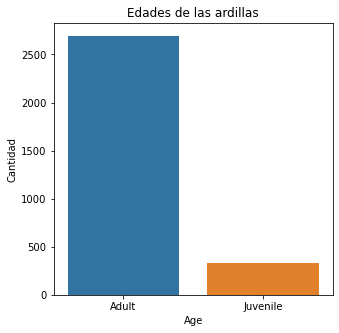

In [42]:
fig,ax = plt.subplots(figsize=(5,5))
sns.countplot(data=df, x= 'age')
ax.set_title("Edades de las ardillas")
ax.set_xlabel("Age")
ax.set_ylabel("Cantidad")
plt.show()

Como se ve, en la mayoría de los avistamientos las ardillas eran adultas.

# Colores de las ardillas

¿De qué colores eran las ardillas que se vieron?

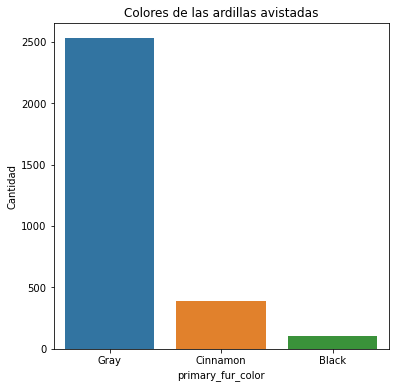

In [43]:
fig,ax = plt.subplots(figsize=(6,6))
sns.countplot(data=df, x= 'primary_fur_color')
ax.set_ylabel("Cantidad")
ax.set_title("Colores de las ardillas avistadas")
plt.show()

# ¿Dónde estaban las ardillas de cada color?

In [44]:
m = folium.Map(location=[40.781781, -73.966787], zoom_start=14)

color_map = {"Black":"black", "Cinnamon": "red", "Gray": "gray"}

for i in range(len(df)):
    folium.CircleMarker(
    location=[df.iloc[i,1],df.iloc[i,0]],
    radius=2,
    color = color_map[df.loc[i,'primary_fur_color']],
    icon=folium.Icon(icon="cloud")).add_to(m)
  
m

# Colores "Highlight" 

Analicemos qué cantidad de ardillas tenian cada posible "Highlight color"

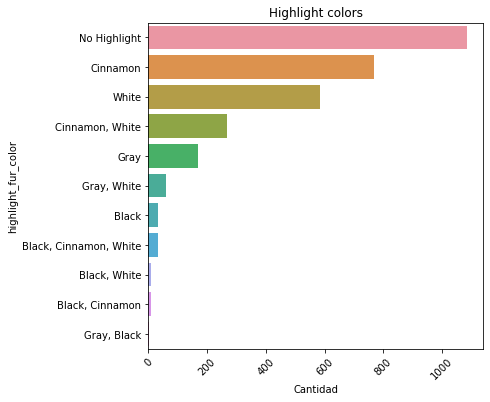

In [45]:
fig,ax = plt.subplots(figsize=(6,6))
sns.countplot(data=df, y= 'highlight_fur_color', order = df['highlight_fur_color'].value_counts().index)
ax.set_title("Highlight colors")
ax.set_xlabel("Cantidad")
plt.xticks(rotation = 45)
plt.show()

# ¿Qué combinación de colores es más probable ver?

Veámos ahora qué combinaciones de colores se observaron más frecuentemente en los avistamientos

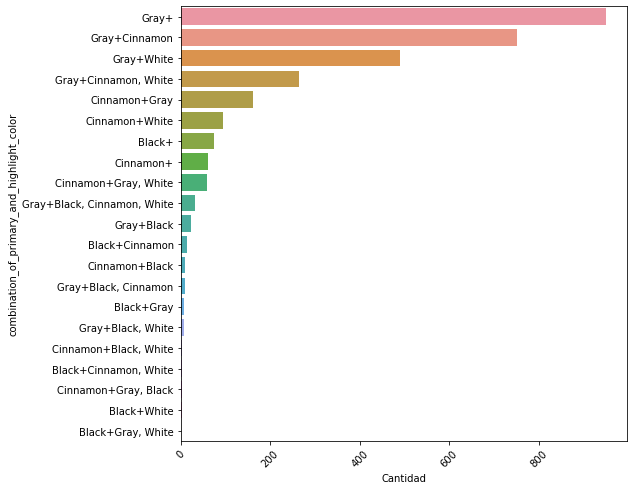

In [46]:
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(data=df, y= 'combination_of_primary_and_highlight_color',
             order = df['combination_of_primary_and_highlight_color'].value_counts().index)
ax.set_xlabel("Cantidad")
plt.xticks(rotation = 45)
plt.show()

# ¿Se vieron diferencias en los movimientos de la cola entre las ardillas adultas y jóvenes?

Para poder responder a esta pregunta, calculemos primero por edad cuál fue el porcentaje de ardillas de cada edad que se avistaron haciendo cada movimiento de cola posible.

In [47]:
df_group0 = df.groupby('age').agg({'tail_twitches':'sum','tail_flags':'sum'}).apply(lambda x: round(x/x.sum(),2), axis=1)
df_group0.reset_index()

age  tail_twitches  tail_flags
0     Adult           0.73        0.27
1  Juvenile           0.75        0.25

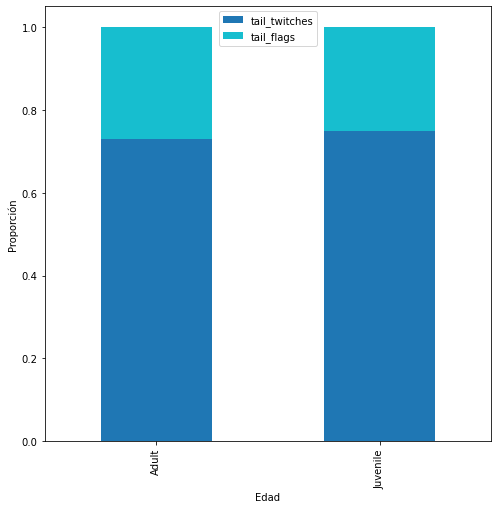

In [48]:
df_group0.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(8, 8));
plt.legend(loc="upper center")
plt.xlabel("Edad")
plt.ylabel("Proporción")
plt.show()

De la tabla y gráfico anterior, vemos claramente que independientemente de la edad la mayoría de los movimientos de cola son del tipo "twitches".

# ¿Es más probable ver las ardillas en el suelo ó en los árboles?

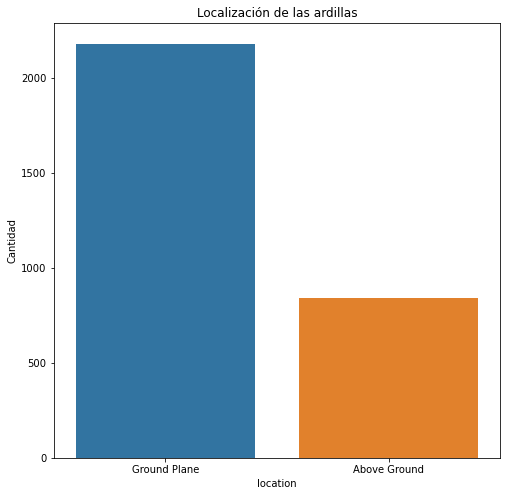

In [49]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(data=df, x = 'location')
ax.set_ylabel("Cantidad")
ax.set_title("Localización de las ardillas")
plt.show()

Claramente vemos que hay que mirar al suelo. Sin embargo, es muy probable que tengamos un "sesgo" ya que la mayoría de la gente no va mirando las copas de los árboles. Por lo tanto, se observa una mayor frecuencia de avistamientos en el suelo. 

# ¿Qué estaban haciendo las ardillas cuando fueron avistadas?

Nuevamente, no podemos responder a esta pregunta directamente. Debemos primero agrupar las ardillas por localización y luego sumar cuántas ardillas estaban haciendo cada posible acción.

In [50]:
df_group = df.groupby('location').agg({'running':'sum','chasing':'sum','climbing':'sum','eating':'sum','foraging':'sum'})
df_group = df_group.reset_index().melt(id_vars="location").rename(columns=str.title)
df_group

Location  Variable  Value
0  Above Ground   running    165
1  Ground Plane   running    565
2  Above Ground   chasing    101
3  Ground Plane   chasing    178
4  Above Ground  climbing    520
5  Ground Plane  climbing    138
6  Above Ground    eating    155
7  Ground Plane    eating    605
8  Above Ground  foraging    137
9  Ground Plane  foraging   1298

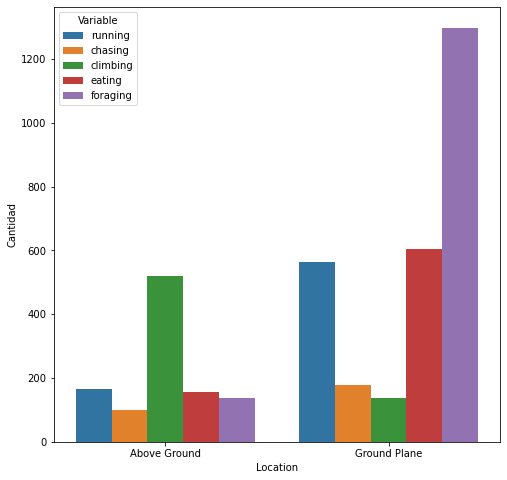

In [51]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df_group, x="Location",y="Value",hue="Variable",ax=ax)
ax.set_ylabel("Cantidad")
plt.show()

Analicemos ahora qué sucede si agrupamos por franja horaria "shift"

In [52]:
df_group2 = df.groupby('shift').agg({'running':'sum','chasing':'sum','climbing':'sum','eating':'sum','foraging':'sum'})
df_group2 = df_group2.reset_index().melt(id_vars="shift").rename(columns=str.title)
df_group2

Shift  Variable  Value
0    AM   running    327
1    PM   running    403
2    AM   chasing    131
3    PM   chasing    148
4    AM  climbing    340
5    PM  climbing    318
6    AM    eating    296
7    PM    eating    464
8    AM  foraging    601
9    PM  foraging    834

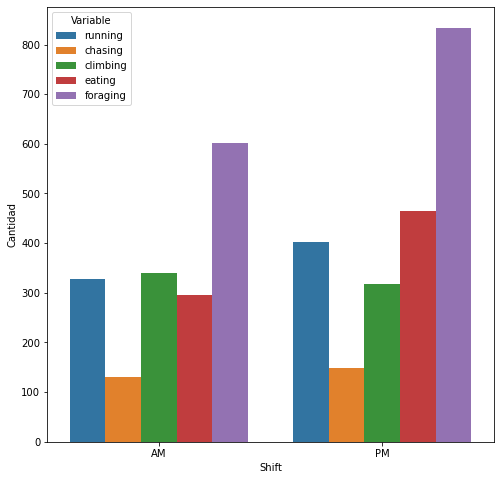

In [53]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df_group2, x="Shift",y="Value",hue="Variable",ax=ax)
ax.set_ylabel("Cantidad")
plt.show()

De acuerdo con el gráfico anterior, lo más común es ver que las ardillas estén "foraging" y lo menos común es "chasing", independientemente de la franja horaria. Por contra, en las actividades "eating", "climbing" y "running" sí que se aprecian diferencias en función de la franja horaria. Así, por las mañanas la segunda actividad más frecuente es "climbing" mientras que por las tardes es "eating". Finalmente, la tercera actividad más frecuente es "running" independientemente de la franja horaria.

# ¿Qué tipo de sonidos emiten las ardillas?

Nuevamente, necesitamos agregar los resultados por franja horaria para responder a esta pregunta.

In [54]:
df_group3 = df.groupby('shift').agg({'kuks':'sum','quaas':'sum','moans':'sum'})
df_group3 = df_group3.reset_index().melt(id_vars="shift").rename(columns=str.title)
df_group3

Shift Variable  Value
0    AM     kuks     54
1    PM     kuks     48
2    AM    quaas     20
3    PM    quaas     30
4    AM    moans      1
5    PM    moans      2

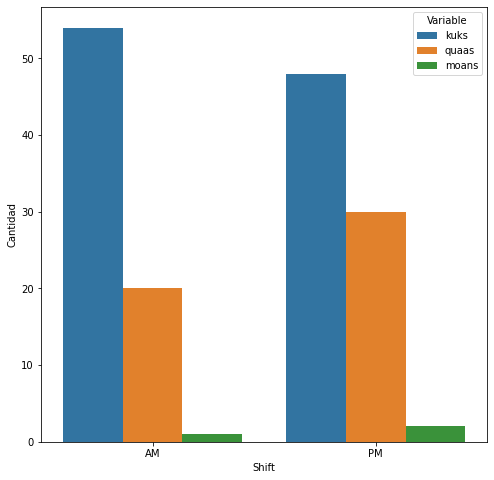

In [55]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df_group3, x="Shift",y="Value",hue="Variable",ax=ax)
ax.set_ylabel("Cantidad")
plt.show()

En este caso, no se aprecian diferencias significativas en los tipos de sonidos más frecuentes según la franja horaria aunque ciertamente, cambian las proporciones. Así pues, el sonido más frecuente es "kuks", seguido de "quaas" y finalmente "moans".

# ¿Hay diferencias en la cantidad de sonidos emitidos por ardillas adultas y jóvenes?

In [56]:
df_group4 = df.groupby('age').agg({'kuks':'sum','quaas':'sum','moans':'sum'})
df_group4 = df_group4.reset_index().melt(id_vars="age").rename(columns=str.title)
df_group4

Age Variable  Value
0     Adult     kuks     88
1  Juvenile     kuks     14
2     Adult    quaas     45
3  Juvenile    quaas      5
4     Adult    moans      3
5  Juvenile    moans      0

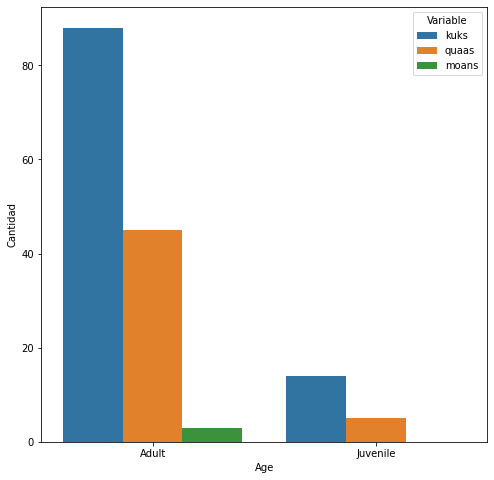

In [57]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df_group4, x="Age",y="Value",hue="Variable",ax=ax)
ax.set_ylabel("Cantidad")
plt.show()

Claramente se ve que las ardillas jóvenes no emiten "moans"

# ¿Qué actitud tenian las ardillas hacia los humanos cuando fueron avistadas?

In [58]:
df_group5 = df.groupby('age').agg({'approaches':'sum','indifferent':'sum','runs_from':'sum'})
df_group5 = df_group5.reset_index().melt(id_vars="age").rename(columns=str.title)
df_group5

Age     Variable  Value
0     Adult   approaches    156
1  Juvenile   approaches     22
2     Adult  indifferent   1310
3  Juvenile  indifferent    144
4     Adult    runs_from    597
5  Juvenile    runs_from     81

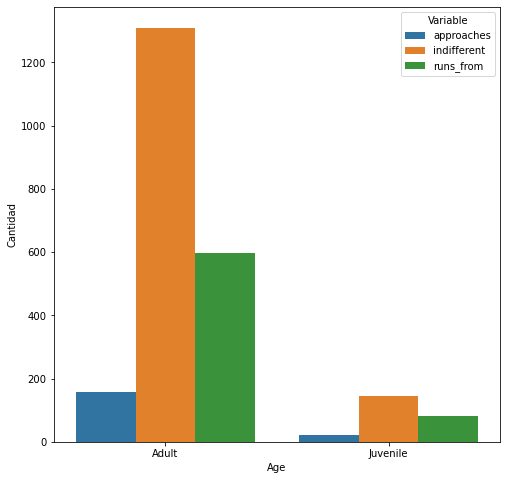

In [59]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df_group5, x="Age",y="Value",hue="Variable",ax=ax)
ax.set_ylabel("Cantidad")
plt.show()

Como se puede ver, independdientemente de la edad la actitud más frecuente fue la idiferencia; probablemente por que ya estuvien acostumbradas a las presencia humana. La segunda actividad más frecuente fue huir, quizás por que fueron asustadas involutariamente. Por último la actividad menos frecuente fue aproximarse, probablemente en busca de comida. 

# ¿En qué lugares las ardillas se aproximaron a los humanos?

In [60]:
m2 = folium.Map(location=[40.781781, -73.966787], zoom_start=14)

for i in range(len(df)):
    
    if (df.loc[i,"age"]=="Juvenile"):
        radius = 2
    else:
        radius = 4
        
    if (df.loc[i,"approaches"]==1):

        folium.CircleMarker(
        location=[df.iloc[i,1],df.iloc[i,0]],
        radius=radius,
        color = "green",
        icon=folium.Icon(icon="cloud")).add_to(m2)
  
m2

¿Cuál podría ser la causa de que las interacciones con humanos acontecieran en estos lugares? Una posible explicación es que las ardillas se aproximaran a los humanos para obtener comida. ¿Y dónde estában los humanos que llevaban comida? Seguramente, cerca de los sitios de comida para llevar. Veámos dónde están.

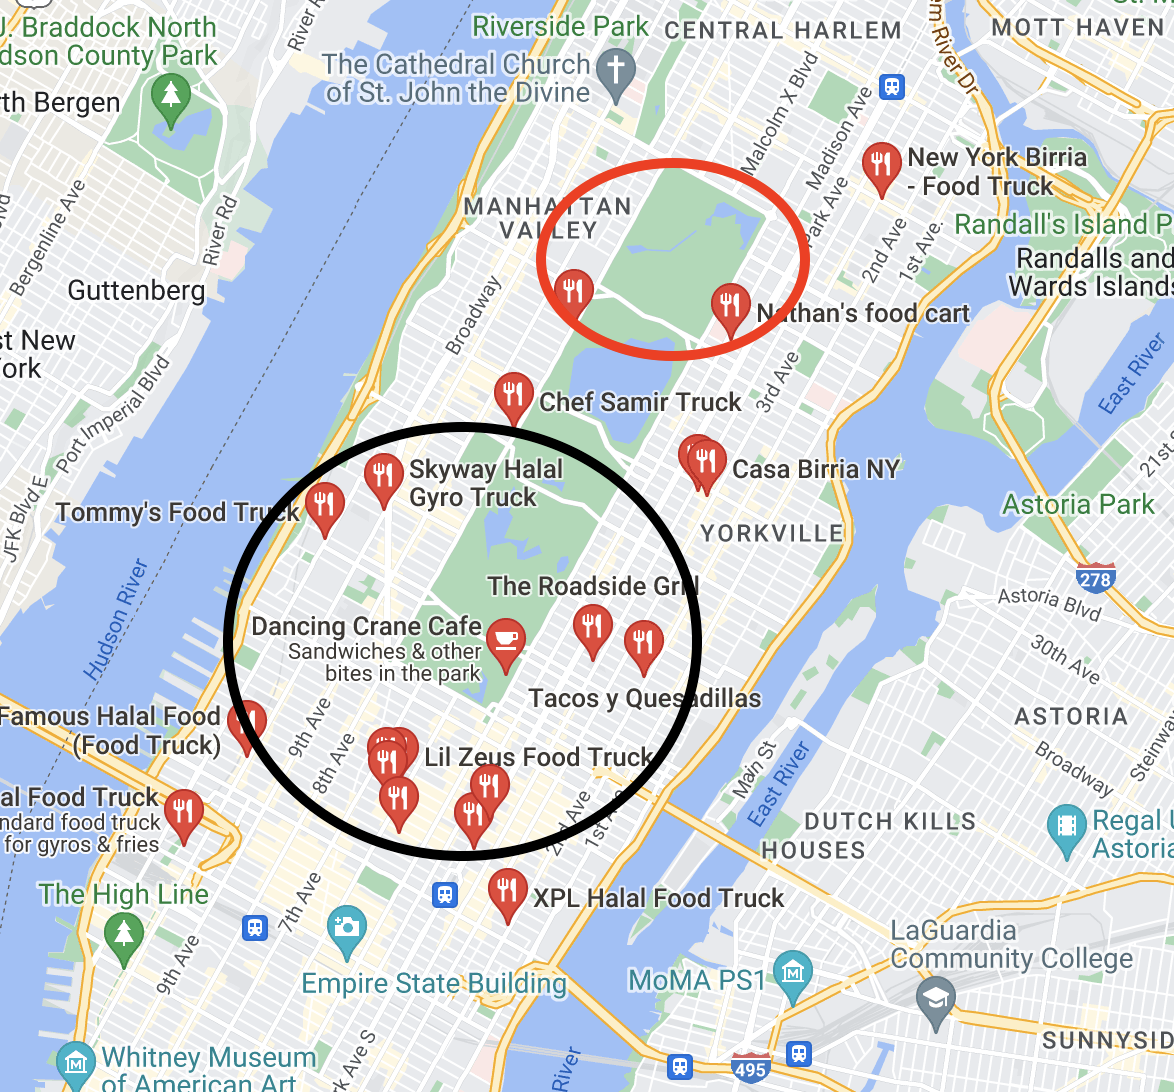

# ¿Podemos responder nuestra pregunta inicial?: ¿Dónde es más probable encontrar ardillas?

Podríamos intentar generar un modelo para predecir dónde es más probable encontrar ardillas, pero después de analizar los datos ya lo hemos visto. No siempre es necesario generar modelos. En nuestro caso, solo con unas pocas visualizaciones de datos ya podemos tener una buena idea de a qué sitio de Central Park es mejor ir. 

Solamente crearemos modelos cuando no podemos obtener una respuesta clara mediante simples visualizaciones.

Además, también hemos visto que si llevamos algo de comida obtenida de un puesto de venta callejera y entramos por la zona sur es más problable tener un encuentro. Ya sabes, escoje un buen lugar en la zona sur para ir de picnic y espera.